In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import loompy
import anndata


# Make the notebook work from both Yike and Fabio's computers
if os.path.isdir='/home/yike':
    





sc.settings.verbosity = 3     
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
adata=sc.read_h5ad('/home/yike/phd/dengue/data/mergedata_20200930_high_quality.h5ad')
#adata = sc.read_loom('good.loom', X_name='spliced', obs_names='cellID', var_names='GeneName', dtype='float32',validate=False)
adata.obs_names_make_unique() 
adata

scanpy==1.6.0 anndata==0.7.4 umap==0.4.5 numpy==1.19.1 scipy==1.5.2 pandas==1.1.1 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.7.0 leidenalg==0.8.1


AnnData object with n_obs × n_vars = 106806 × 37907
    obs: 'Age', 'Condition', 'DENV_reads', 'Gender', 'ID', 'cell_quality', 'cell_subtype', 'cell_type', 'doublets', 'n_counts', 'n_genes', 'platform'
    var: 'feature_types_10X', 'feature_types_plate'

In [2]:
adata=adata[adata.obs['cell_quality']=='high']
adata_children=adata[adata.obs['platform']=='10X']
adata_adults=adata[adata.obs['platform']=='plate']

/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [3]:
#'Age'：共16个病人，11个儿童，5个成年人
#'Condition'：S_dengue,dengue,Healthy,DWS
#'cell_subtype'：unknown, naive_B, CD14+CD16-mono, CD4-CD8+t, memory_B, CD16+CD14+mono, CD4+CD8-t, CD14-CD16+mono, CD4+CD8+t
#'cell_type'：NK_cells, B_cells, T_cells, Monocytes, Plasmablasts, pDCs, cDCs

In [20]:
adata.obs

,Age,Condition,DENV_reads,Gender,ID,cell_quality,cell_subtype,cell_type,doublets,n_counts,n_genes,platform
AAACCTGAGAGACGAA-1-1_019,13,dengue,0.0,F,1_019_01,high,naive_B,B_cells,no,1060.0,499,10X
AAACCTGAGCTATGCT-1-1_019,13,dengue,0.0,F,1_019_01,high,unknown,NK_cells,no,1447.0,747,10X
AAACCTGAGCTGTTCA-1-1_019,13,dengue,0.0,F,1_019_01,high,unknown,NK_cells,no,2241.0,1041,10X
AAACCTGAGTACGATA-1-1_019,13,dengue,0.0,F,1_019_01,high,unknown,NK_cells,no,1457.0,762,10X
AAACCTGCAAACCTAC-1-1_019,13,dengue,0.0,F,1_019_01,high,unknown,T_cells,no,1723.0,772,10X
...,...,...,...,...,...,...,...,...,...,...,...,...
1001702204_P15,26,S_dengue,0.0,F,1_036_01,high,unknown,pDCs,no,93220.0,2487,plate
1001702204_P16,26,S_dengue,0.0,F,1_036_01,high,unknown,pDCs,no,104288.0,2278,plate
1001702204_P17,26,S_dengue,0.0,F,1_036_01,high,unknown,pDCs,no,109427.0,2570,plate
1001702204_P18,26,S_dengue,0.0,F,1_036_01,high,unknown,Monocytes,yes,119484.0,4645,plate


In [4]:
# interaction between different celltypes within children SD patients
interaction=pd.read_csv('/home/yike/phd/dengue/data/interaction_unpacked_mouse.tsv',sep='\t')[['gene_name_a','gene_name_b']]

In [5]:
#Condition
adata_conditions={}
Conditions=['S_dengue','dengue','Healthy','DWS']

for Condition in Conditions:
    adata_conditions[Condition]=adata[adata.obs['Condition']==Condition]

adata_conditions.keys()

dict_keys(['S_dengue', 'dengue', 'Healthy', 'DWS'])

In [6]:
#Condition of children
adata_children_conditions={}
Conditions=['S_dengue','dengue','Healthy','DWS']

for Condition in Conditions:
    adata_children_conditions[Condition]=adata_children[adata_children.obs['Condition']==Condition]

adata_children_conditions.keys()

dict_keys(['S_dengue', 'dengue', 'Healthy', 'DWS'])

In [7]:
#celltypes of children with different conditions
adata_children_con_ct={}
cell_types=['B_cells','NK_cells','T_cells', 'Monocytes', 'Plasmablasts', 'pDCs', 'cDCs']
Conditions=['S_dengue','dengue','Healthy','DWS']

for Condition in Conditions:
    for cell_type in cell_types:
        key=(Condition,cell_type)
        adata_children_con_ct[key]=adata_children_conditions[Condition][adata_children_conditions[Condition].obs['cell_type']==cell_type]

adata_children_con_ct.keys()

dict_keys([('S_dengue', 'B_cells'), ('S_dengue', 'NK_cells'), ('S_dengue', 'T_cells'), ('S_dengue', 'Monocytes'), ('S_dengue', 'Plasmablasts'), ('S_dengue', 'pDCs'), ('S_dengue', 'cDCs'), ('dengue', 'B_cells'), ('dengue', 'NK_cells'), ('dengue', 'T_cells'), ('dengue', 'Monocytes'), ('dengue', 'Plasmablasts'), ('dengue', 'pDCs'), ('dengue', 'cDCs'), ('Healthy', 'B_cells'), ('Healthy', 'NK_cells'), ('Healthy', 'T_cells'), ('Healthy', 'Monocytes'), ('Healthy', 'Plasmablasts'), ('Healthy', 'pDCs'), ('Healthy', 'cDCs'), ('DWS', 'B_cells'), ('DWS', 'NK_cells'), ('DWS', 'T_cells'), ('DWS', 'Monocytes'), ('DWS', 'Plasmablasts'), ('DWS', 'pDCs'), ('DWS', 'cDCs')])

ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:39)


/usr/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:405: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/usr/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:407: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:404: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


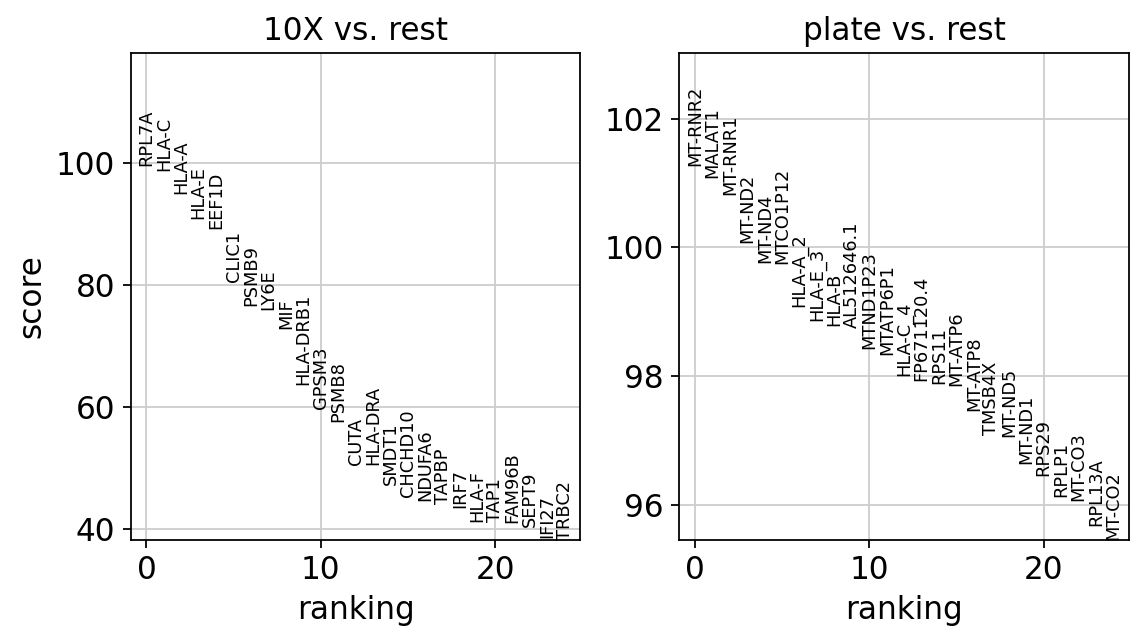

In [8]:
#severe dengue儿童相比成人特异性表达的基因
sc.tl.rank_genes_groups(adata_conditions['S_dengue'], 'platform', method='wilcoxon')#10X:children, plate:adults
sc.pl.rank_genes_groups(adata_conditions['S_dengue'], n_genes=25, sharey=False)

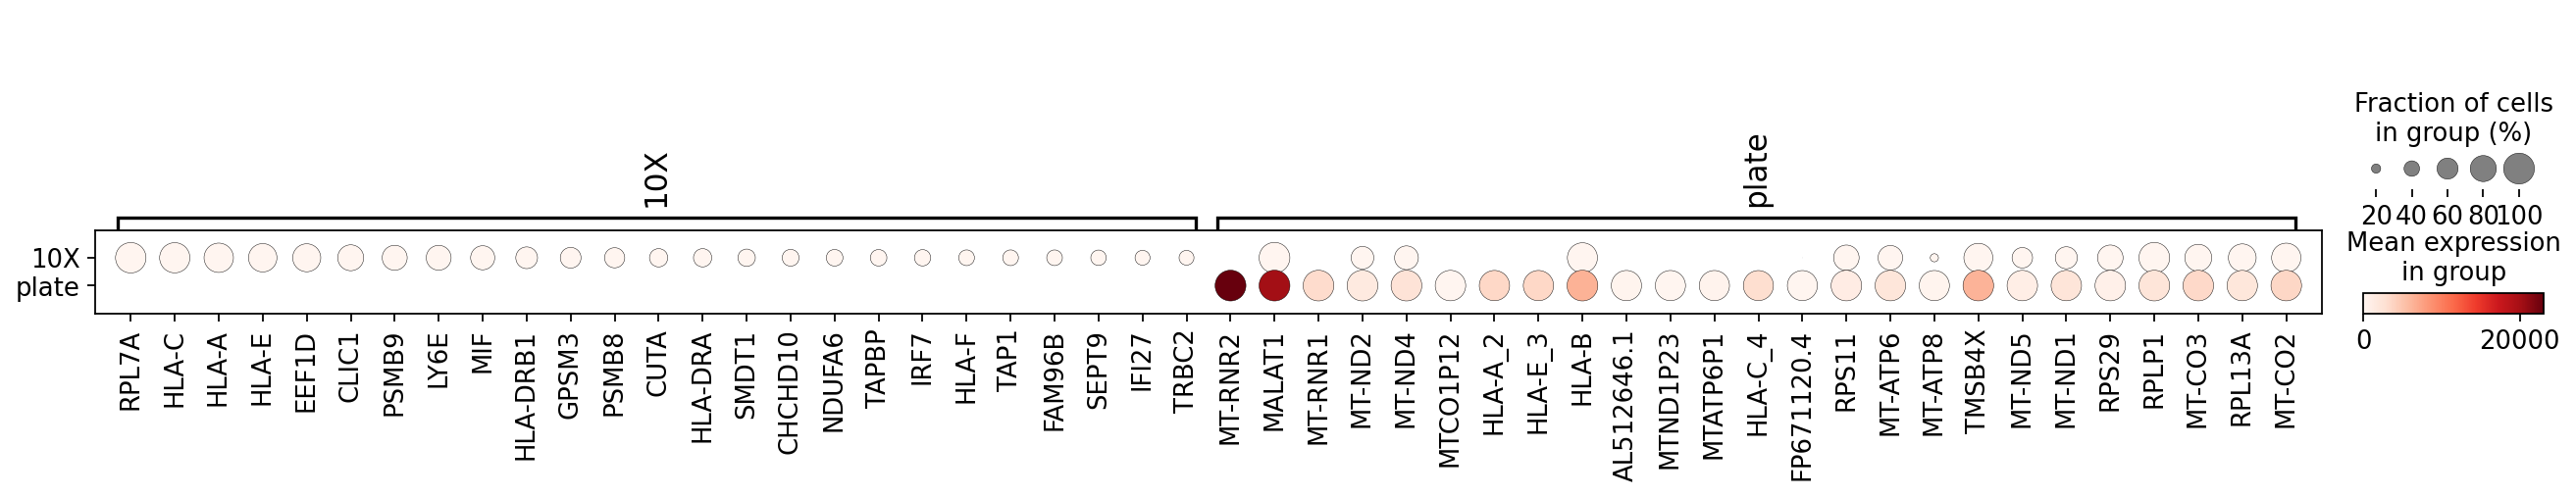

In [9]:
sc.pl.rank_genes_groups_dotplot(adata_conditions['S_dengue'], n_genes=25)

ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:04:27)


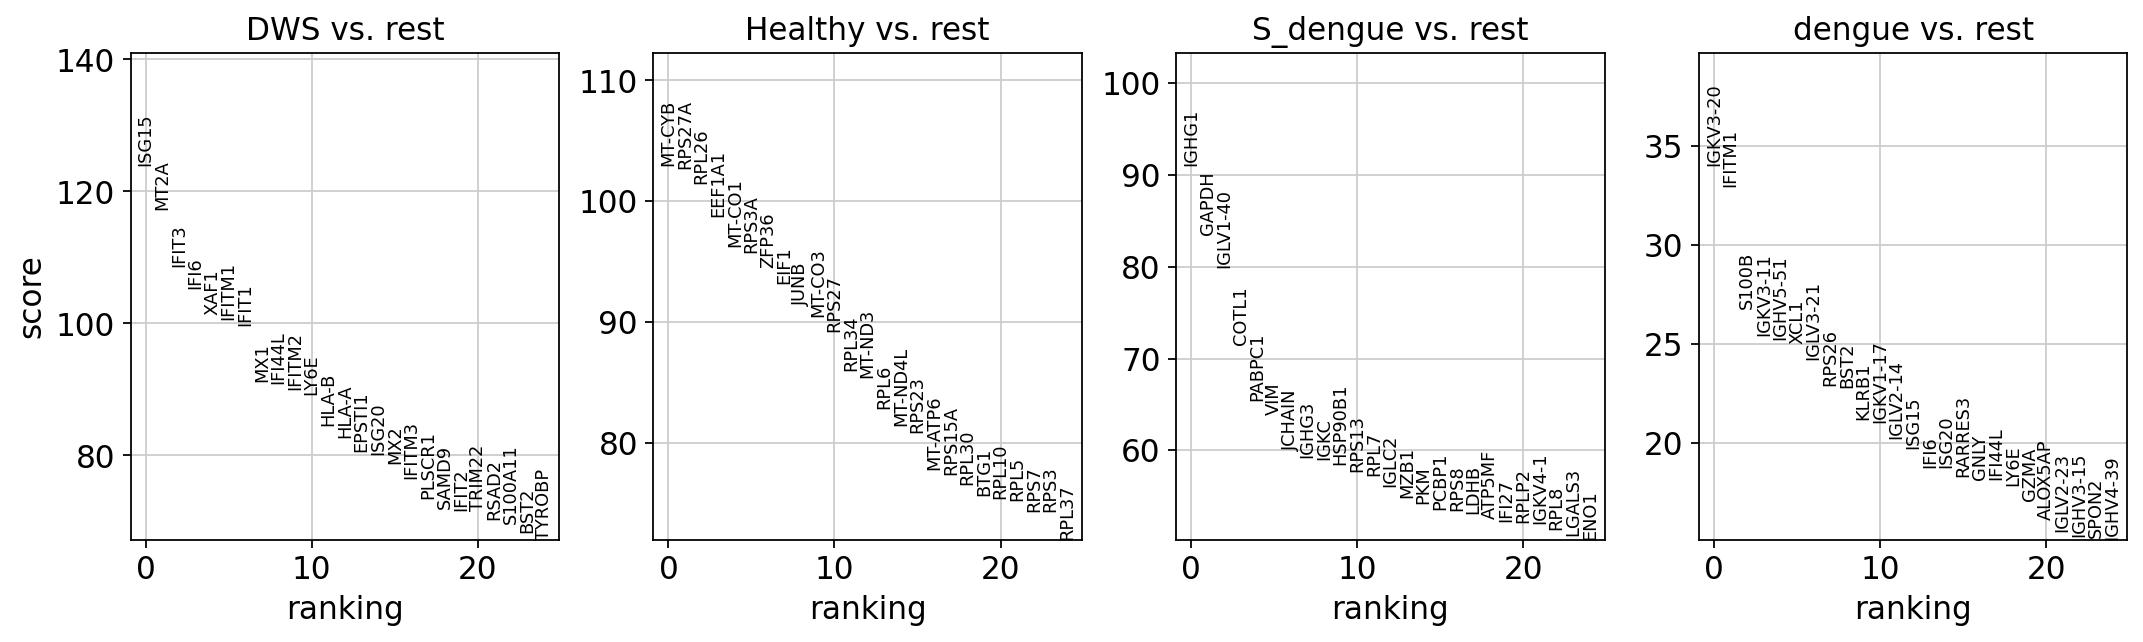

In [10]:
#儿童severe dengue不同condition特异性表达的基因
sc.tl.rank_genes_groups(adata_children, 'Condition', method='wilcoxon')
sc.pl.rank_genes_groups(adata_children, n_genes=25, sharey=False)

/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:40)
Storing dendrogram info using `.uns["dendrogram_['Condition']"]`


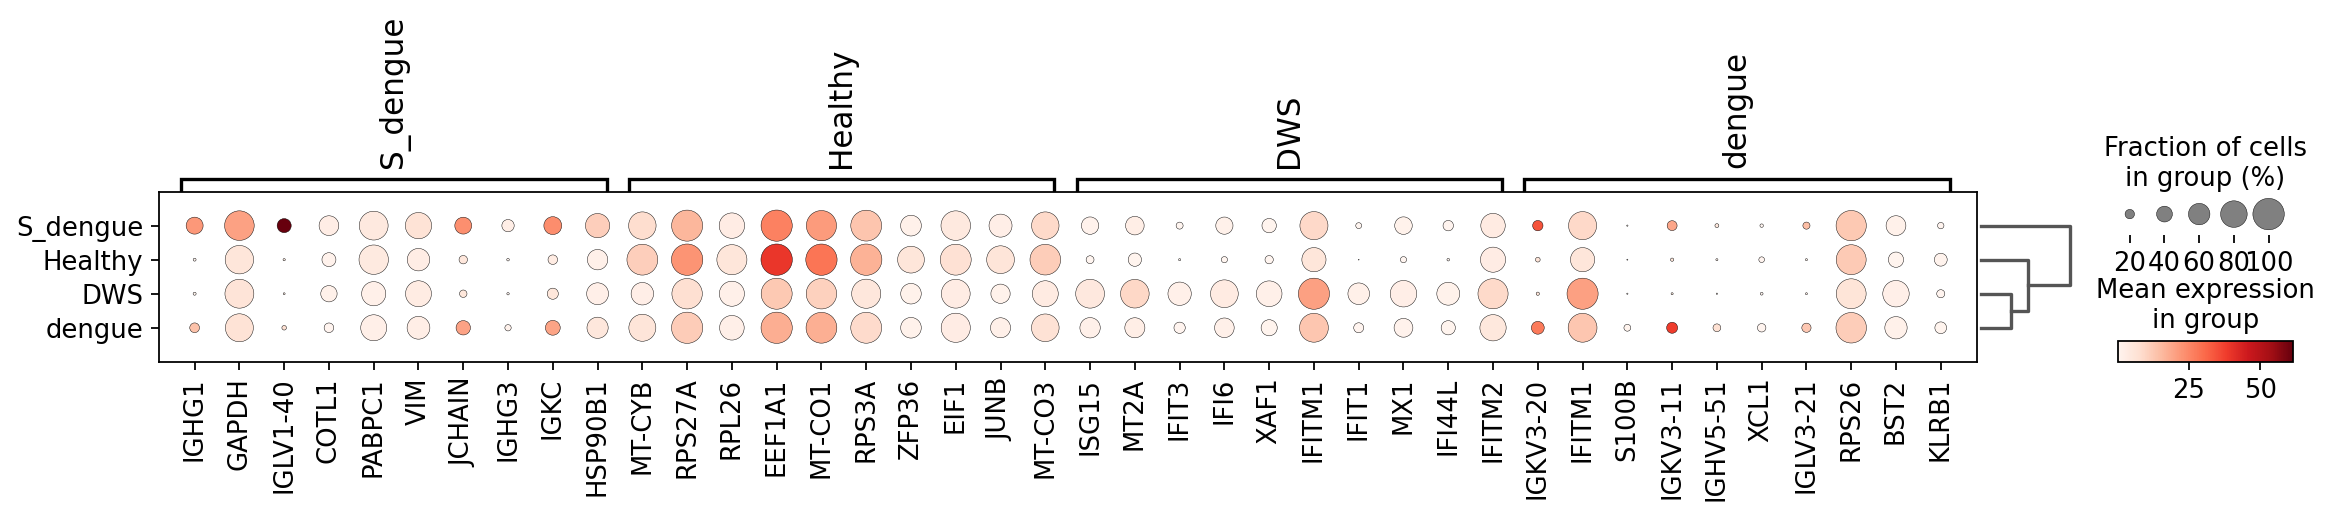

In [11]:
sc.pl.rank_genes_groups_dotplot(adata_children, n_genes=10)

ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:28)


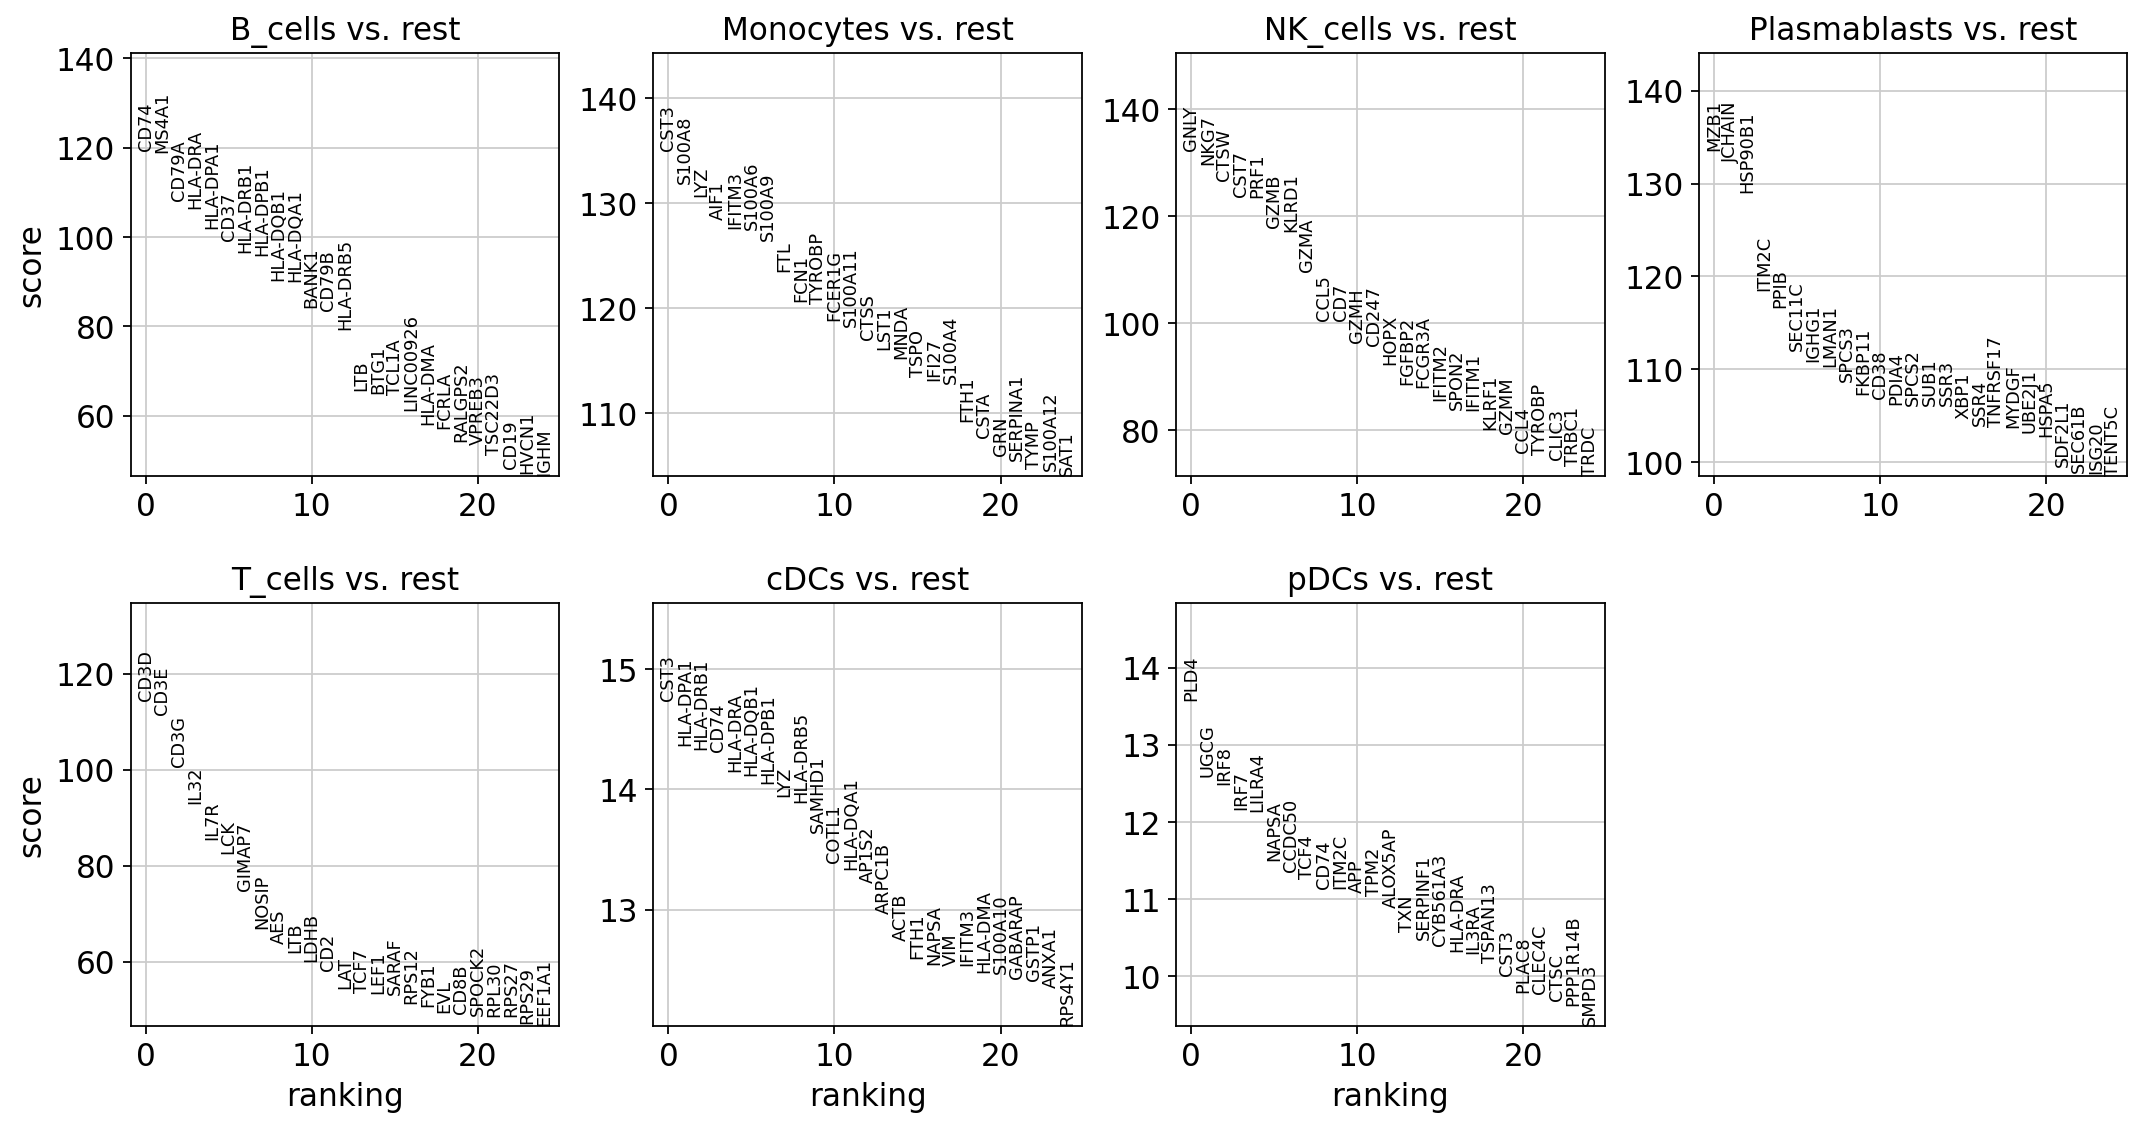

In [12]:
#儿童severe dengue不同celltype的特异性基因
sc.tl.rank_genes_groups(adata_children_conditions['S_dengue'], 'cell_type', method='wilcoxon')
sc.pl.rank_genes_groups(adata_children_conditions['S_dengue'], n_genes=25, sharey=False)

/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:22)
Storing dendrogram info using `.uns["dendrogram_['cell_type']"]`


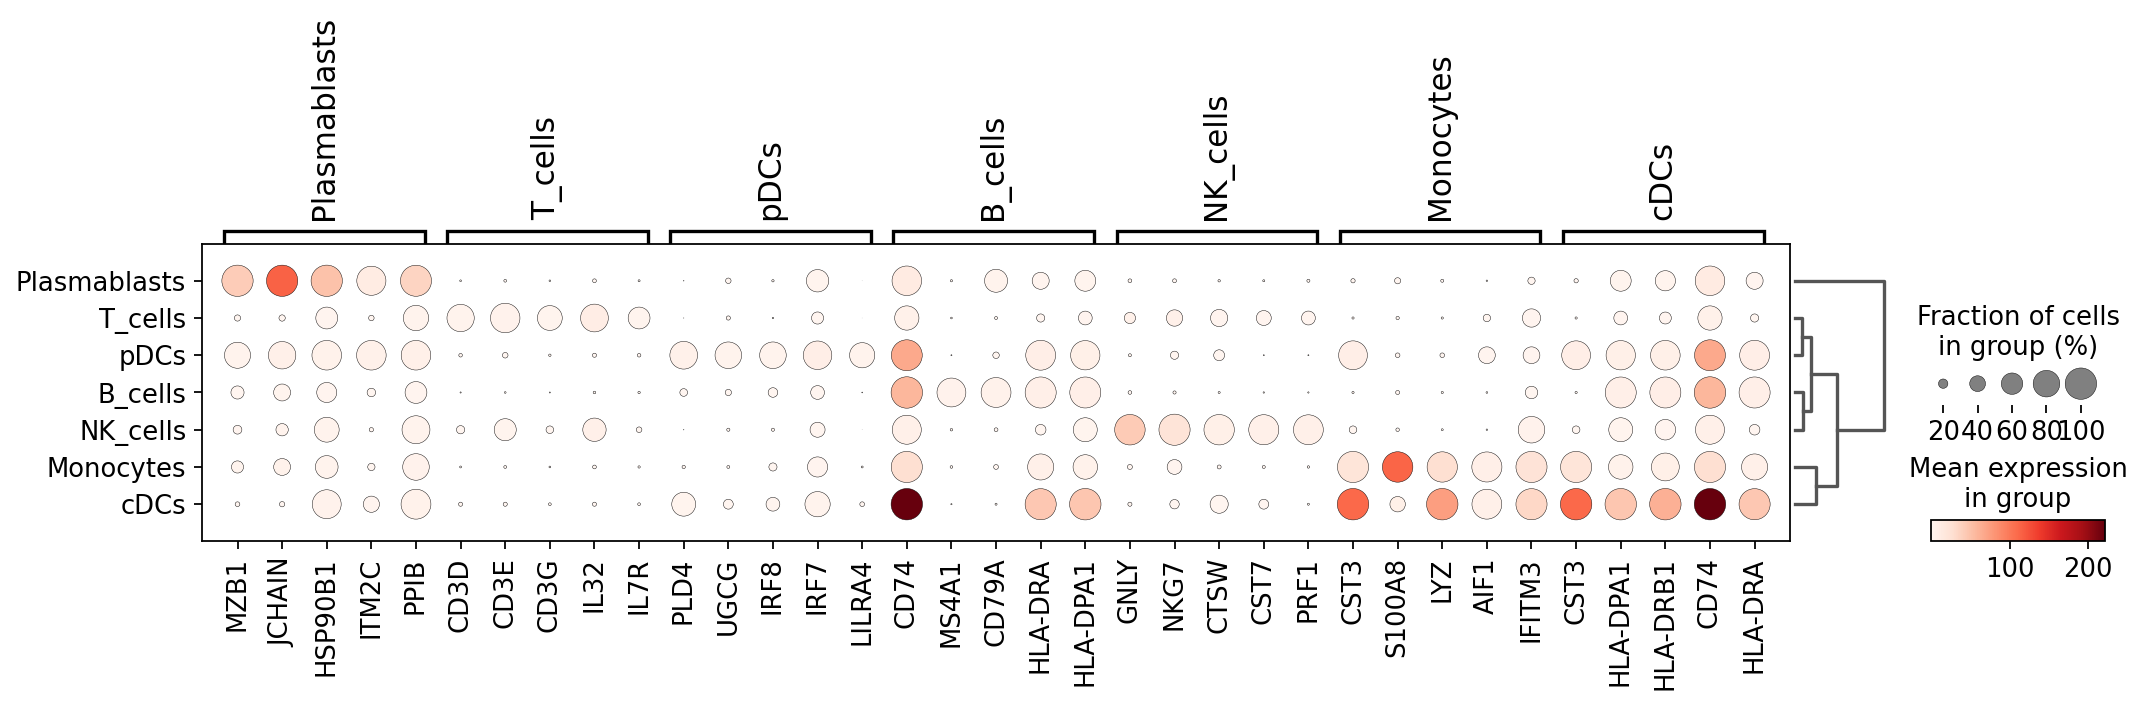

In [13]:
sc.pl.rank_genes_groups_dotplot(adata_children_conditions['S_dengue'], n_genes=5)

/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


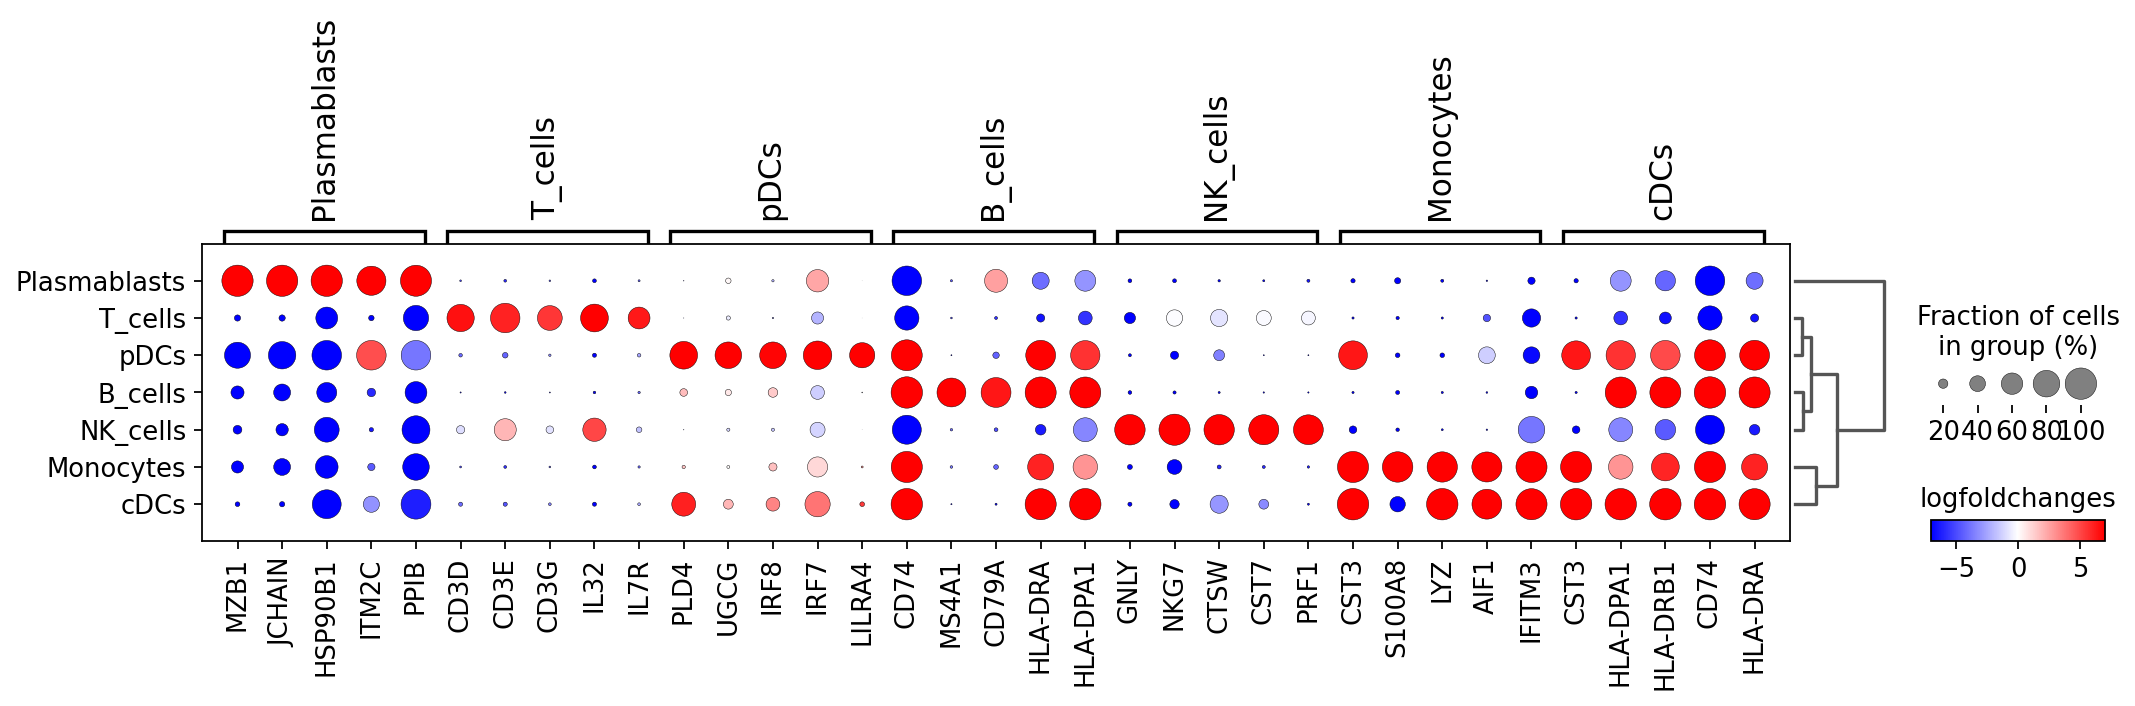

In [14]:
sc.pl.rank_genes_groups_dotplot(adata_children_conditions['S_dengue'],n_genes=5,values_to_plot='logfoldchanges',min_logfoldchange=2 ,vmax=7,vmin=-7,cmap='bwr')